In [27]:
import IPython.core.display as di
# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)
# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

Toggle code

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 1. Load the data file

In [29]:
red = pd.read_csv('winequality-red.csv', ';')

In [30]:
print(red.head(2))

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70          0.0             1.9      0.076   
1            7.8              0.88          0.0             2.6      0.098   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   

   alcohol  quality  
0      9.4        5  
1      9.8        5  


#### 2. Construct a new binary column “good wine” that indicates whether the wine is good (which we define as having a quality of 6 or higher) or not

Build the new column using a for loop

In [31]:
for i in red.index: 
    if red.loc[i, 'quality'] >= 6:
        red.loc[i, 'good wine'] =  1
    else:
        red.loc[i, 'good wine'] =  0

In [32]:
print(red[['quality','good wine']].head(5))

   quality  good wine
0        5        0.0
1        5        0.0
2        5        0.0
3        6        1.0
4        5        0.0


#### 3. Splits the data set into a training data set (~50%) and a test data set (~50%) - make sure you shuffle the record before the split;


In [33]:
print(red.columns.values)

['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol' 'quality' 'good wine']


The input values include: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'].

In [34]:
from sklearn import model_selection

In [35]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(red.iloc[:,0:11], 
                                                                    red['good wine'],
                                                                    test_size=0.5, 
                                                                    random_state=0)

#### 4. Normalises the data according to the Z-score transform

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
scaler = StandardScaler().fit(X_train)
X_train_N = scaler.transform(X_train)

In [38]:
scaler = StandardScaler().fit(X_test)
X_test_N = scaler.transform(X_test)

#### 5. Loads and trains the k-Nearest Neighbours classifiers for k = 1, 6, 11, 16, ..., 500

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
# create a list of k values (P.S. there is a typo in the question, 
# the last value should be 501 rather than 500)
k_list = [i for i in range(1,502,5)]
#print(k_list)

In [41]:
#Train the model for k in the k_list
train_errors = {}
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train_N, y_train)
    s = knn.score(X_train_N, y_train)
    train_errors[k] = 1 - s.mean()
    print('Accuracy for traiing model k = %s : %0.4f' % (k, s))

Accuracy for traiing model k = 1 : 1.0000
Accuracy for traiing model k = 6 : 0.8310
Accuracy for traiing model k = 11 : 0.7872
Accuracy for traiing model k = 16 : 0.7785
Accuracy for traiing model k = 21 : 0.7622
Accuracy for traiing model k = 26 : 0.7597
Accuracy for traiing model k = 31 : 0.7522
Accuracy for traiing model k = 36 : 0.7484
Accuracy for traiing model k = 41 : 0.7622
Accuracy for traiing model k = 46 : 0.7622
Accuracy for traiing model k = 51 : 0.7534
Accuracy for traiing model k = 56 : 0.7522
Accuracy for traiing model k = 61 : 0.7547
Accuracy for traiing model k = 66 : 0.7472
Accuracy for traiing model k = 71 : 0.7534
Accuracy for traiing model k = 76 : 0.7472
Accuracy for traiing model k = 81 : 0.7610
Accuracy for traiing model k = 86 : 0.7484
Accuracy for traiing model k = 91 : 0.7534
Accuracy for traiing model k = 96 : 0.7472
Accuracy for traiing model k = 101 : 0.7584
Accuracy for traiing model k = 106 : 0.7484
Accuracy for traiing model k = 111 : 0.7534
Accuracy f

In [42]:
train_error_df = pd.DataFrame.from_dict(train_errors, orient='index').sort_index()
train_error_df.columns = ['Error']

#### 6. Evaluates each classifier using 5-fold cross validation and selects the best classifier

In [43]:
from sklearn.model_selection import cross_val_score

In [44]:
scores = {}
std = {}
errors = {}
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train_N, y_train)
    s = cross_val_score(knn, X_train_N, y_train, cv=5) #store the score for each fold in s
    print('Accuracy for 5-fold cross validation k = %s : %0.4f (+/- %0.4f)' % (k, s.mean(), s.std()))
    std[k] = s.std()
    scores[k] = s.mean()
    errors[k] = 1 - s.mean()

Accuracy for 5-fold cross validation k = 1 : 0.7434 (+/- 0.0357)
Accuracy for 5-fold cross validation k = 6 : 0.7397 (+/- 0.0163)
Accuracy for 5-fold cross validation k = 11 : 0.7347 (+/- 0.0174)
Accuracy for 5-fold cross validation k = 16 : 0.7346 (+/- 0.0274)
Accuracy for 5-fold cross validation k = 21 : 0.7196 (+/- 0.0297)
Accuracy for 5-fold cross validation k = 26 : 0.7308 (+/- 0.0228)
Accuracy for 5-fold cross validation k = 31 : 0.7296 (+/- 0.0220)
Accuracy for 5-fold cross validation k = 36 : 0.7496 (+/- 0.0250)
Accuracy for 5-fold cross validation k = 41 : 0.7446 (+/- 0.0170)
Accuracy for 5-fold cross validation k = 46 : 0.7471 (+/- 0.0224)
Accuracy for 5-fold cross validation k = 51 : 0.7471 (+/- 0.0233)
Accuracy for 5-fold cross validation k = 56 : 0.7471 (+/- 0.0280)
Accuracy for 5-fold cross validation k = 61 : 0.7458 (+/- 0.0338)
Accuracy for 5-fold cross validation k = 66 : 0.7470 (+/- 0.0314)
Accuracy for 5-fold cross validation k = 71 : 0.7496 (+/- 0.0279)
Accuracy for

In [45]:
validation_error_df = pd.DataFrame.from_dict(errors, orient='index').sort_index()
validation_error_df.columns = ['Error']
#train_error_df

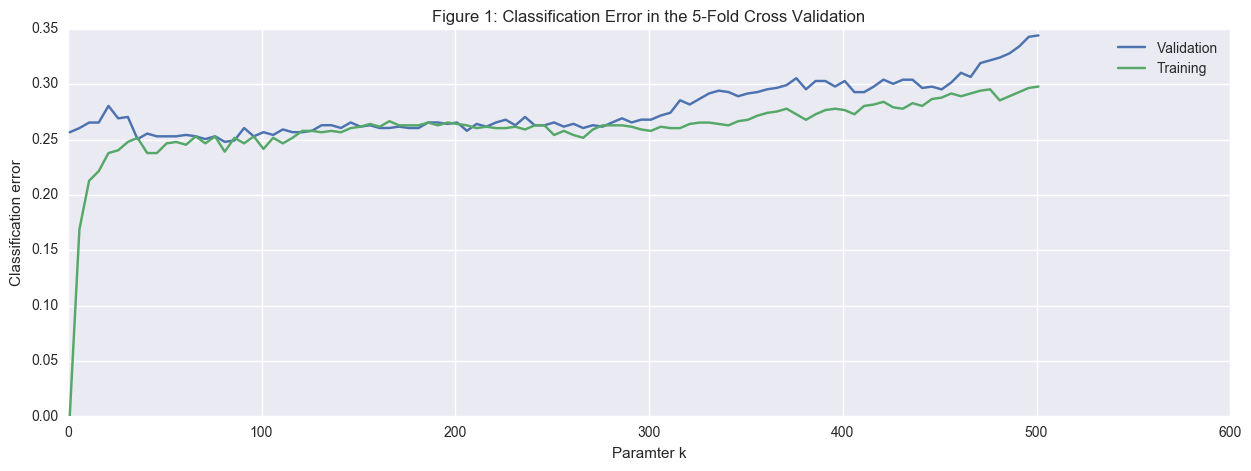

In [46]:
%matplotlib inline
plt.figure(figsize=(15,5))
plt.plot(train_error_df.index.values, validation_error_df.ix[:,0].values, label='Validation')
plt.plot(train_error_df.index.values, train_error_df.ix[:,0].values, label='Training')
plt.xlabel('Paramter k')
plt.ylabel('Classification error')
plt.title('Figure 1: Classification Error in the 5-Fold Cross Validation')
plt.legend()
plt.show()

In [47]:
# get the k value with largest accuracy
best_k = max(scores, key=lambda i: scores[i])
print('The best classifier is with k =', best_k)
print('The corresponding accurracy is', '%0.2f'%scores[best_k])

The best classifier is with k = 81
The corresponding accurracy is 0.75


#### 7. Predicts the generalisation error using the test data set, as well as outputs the result in a confusion matrix.

In [48]:
knn_81 = KNeighborsClassifier(n_neighbors=81).fit(X_train_N, y_train)
knn_81_score = knn_81.score(X_test_N, y_test)
print('The generalisation error is:', 1 - knn_81_score)

The generalisation error is: 0.28


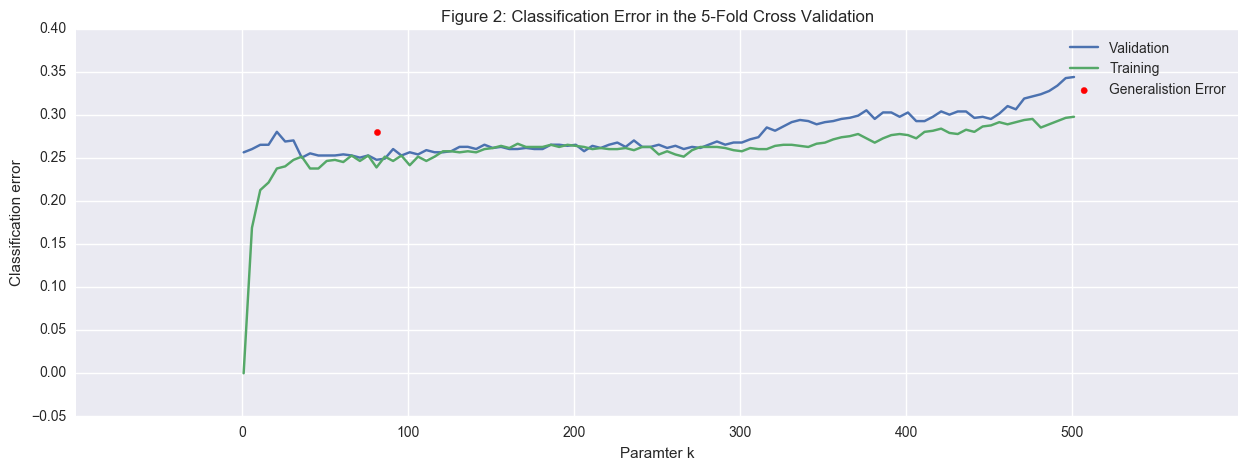

In [49]:
%matplotlib inline
plt.figure(figsize=(15,5))
plt.plot(train_error_df.index.values, validation_error_df.ix[:,0].values, label='Validation')
plt.plot(train_error_df.index.values, train_error_df.ix[:,0].values, label='Training')
plt.scatter(best_k, 1 - knn_81_score, color='r', label='Generalistion Error')
plt.xlabel('Paramter k')
plt.ylabel('Classification error')
plt.title('Figure 2: Classification Error in the 5-Fold Cross Validation')
plt.xticks(np.arange(0,600,100))
plt.legend()
plt.show()

In [50]:
import pandas as pd
y_pred = knn_81.predict(X_test_N)
print("Confusion Matrix is as follow:")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Confusion Matrix is as follow:


Predicted,0.0,1.0,All
True,,,
0.0,257,119,376
1.0,105,319,424
All,362,438,800


#### How do you judge whether the classifier is well-suited for the data set?

There are a few points we would like to comment:

##### 1) Dimensionality Reduction

In [51]:
from sklearn import preprocessing

In [52]:
norm_clf = pd.DataFrame(preprocessing.scale(red.iloc[:,0:11]),
                        columns = red.columns.values[0:11])

In [53]:
corr = norm_clf.corr()

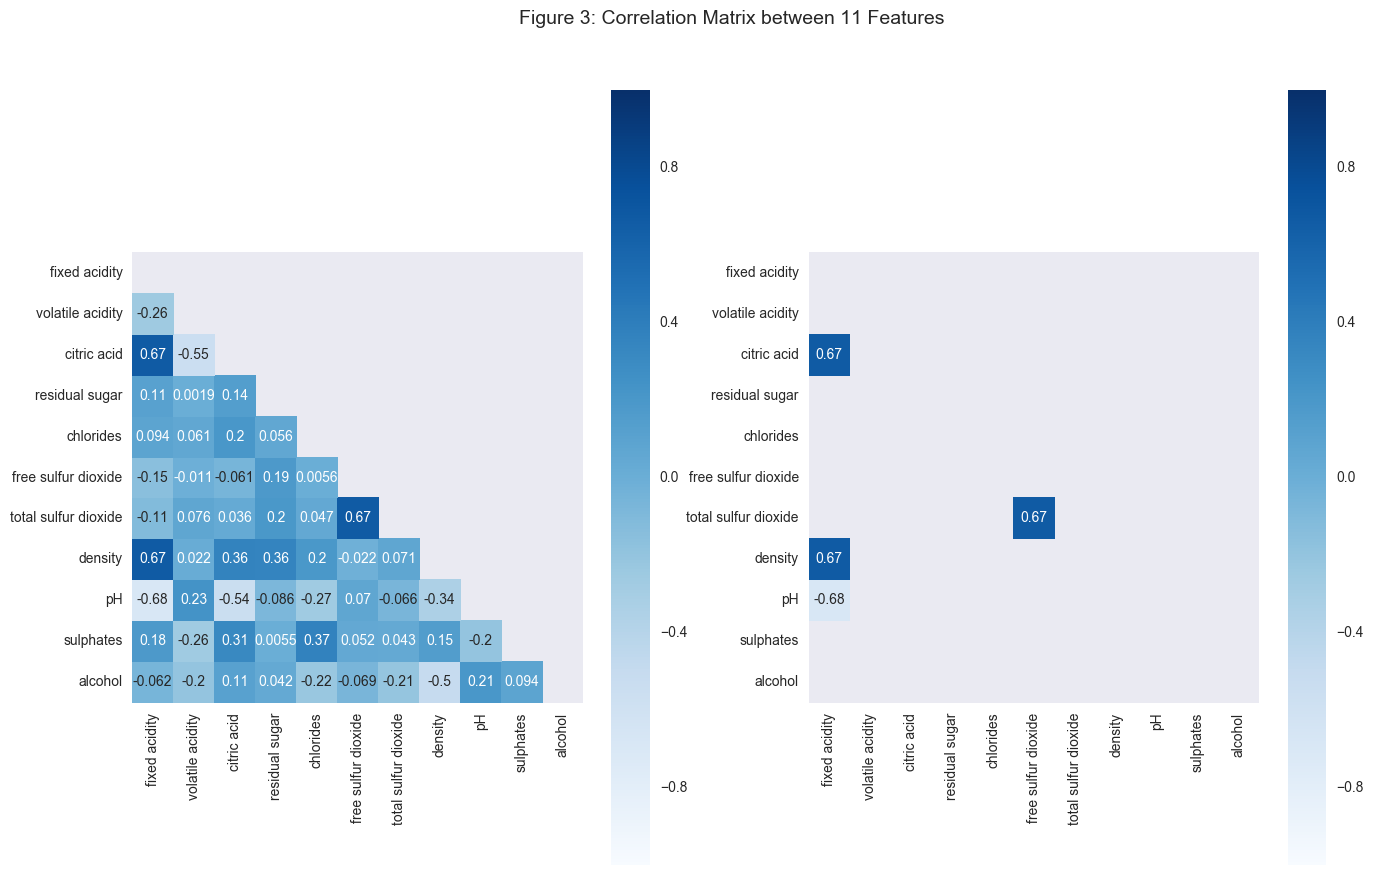

In [54]:
%matplotlib inline
fig = plt.figure(figsize=(16,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
mask1 = np.zeros_like(corr)
mask1[np.triu_indices_from(mask1)] = True
sns.heatmap(corr, square=True, annot=True, cmap='Blues', center=0.0, mask=mask1, ax=ax1)
mask2 = np.array(abs(corr) < 0.6)
mask2[np.triu_indices_from(mask2)] = True
sns.heatmap(corr, square=True, annot=True, cmap='Blues', center=0.0, mask=mask2, ax=ax2)
sns.plt.suptitle('Figure 3: Correlation Matrix between 11 Features', fontsize=14, ha='center')
plt.show()

Currently, we have 11 input variables. Whether all these variables should be included requires further discussion. We conducted dimensionality reduction analysis for these variables. The principle is that strongly correlated variables should be excluded in our modelling.

The correlation matrix shows that some variables have relatively strong correlation with each other. We may consider dropping these variables. We define that the correlation is significant when the coefficient is larger than 0.6 or less than -0.6. Hence, we keep any of 'critic acid', 'density', 'pH' and 'fixed acidity', and either 'total sulfur dioxide' or 'free sulfur dioxide' as stronly correlated variables may contain similar information.

We then decided to remain the columns ['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'total sulfur dioxide', 'sulphates', 'alcohol']. Repeat the kNN model again to see whether the accuracy could be improved.

In [55]:
X_tr, X_te, y_train, y_test = model_selection.train_test_split(red[['fixed acidity', 
                                                                         'volatile acidity', 
                                                                         'residual sugar', 
                                                                         'chlorides', 
                                                                         'total sulfur dioxide', 
                                                                         'sulphates', 
                                                                         'alcohol']], 
                                                                    red['good wine'],
                                                                    test_size=0.5, 
                                                                    random_state=0)

In [56]:
scaler = StandardScaler().fit(X_tr)
X_new_train_N = scaler.transform(X_tr)

In [57]:
scaler = StandardScaler().fit(X_te)
X_new_test_N = scaler.transform(X_te)

In [58]:
accuracy = {}
errors_new = {}
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_new_train_N, y_train)
    s = cross_val_score(knn, X_new_train_N, y_train, cv=5) #store the score for each fold in s
    #print('Accuracy for k = %s : %0.4f (+/- %0.4f)' % (k, s.mean(), s.std()*2))
    accuracy[k] = s.mean()
    errors_new[k] = 1 - s.mean()

In [59]:
train_new_error_df = pd.DataFrame.from_dict(errors_new, orient='index').sort_index()
train_new_error_df.columns = ['Error']
#train_new_error_df
#train_error_df

In [60]:
#train_new_error_df

From the chart, we can see that the classification errors in cross validation with 7 features is consistently smaller that those with 11 features. That is, with reduced dimensionality, the KNN model performed better. Hence, we conclude that the previous modelling with 11 features may not be the most suitable for this case.

In [61]:
# get the k value with largest accuracy
new_best_k = max(accuracy, key=lambda i: accuracy[i])
print('The best classifier is with k =', new_best_k)
print('The corresponding accurracy is', '%0.2f'%accuracy[new_best_k])

The best classifier is with k = 1
The corresponding accurracy is 0.78


In [62]:
knn_1 = KNeighborsClassifier(n_neighbors=1).fit(X_new_train_N, y_train)
knn_1_score = knn_1.score(X_new_test_N, y_test)
print('The generalisation error is:', 1 - knn_1_score)

The generalisation error is: 0.26375


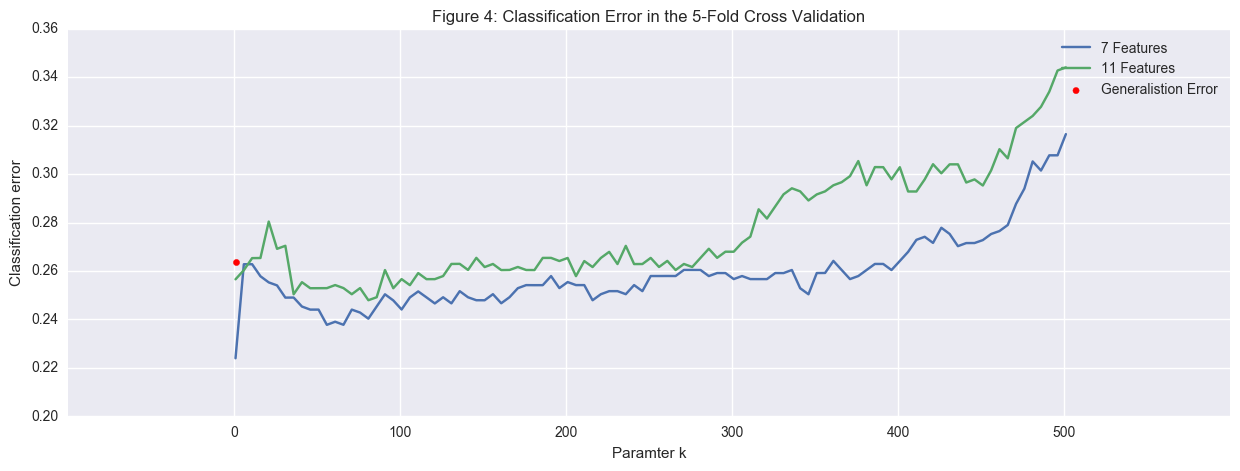

In [63]:
%matplotlib inline
plt.figure(figsize=(15,5))
plt.plot(train_new_error_df.index.values, train_new_error_df.ix[:,0].values, label='7 Features')
plt.plot(train_new_error_df.index.values, validation_error_df.ix[:,0].values, label='11 Features')
plt.scatter(new_best_k, 1 - knn_1_score, color='r', label='Generalistion Error')
plt.xlabel('Paramter k')
plt.ylabel('Classification error')
plt.title('Figure 4: Classification Error in the 5-Fold Cross Validation')
plt.xticks(np.arange(0,600,100))
plt.legend()
plt.show()

##### 2) Model Selection Criteria

The best parameter k = 81 was selected based on the largest mean value of accuracy given by the modelling in cross validation. There are two aspects that could be argued. First, for k is between 30 and 300, from Figure 2 we can see that the classification error does not change significantly (within +/- 0.02). That is, choosing any k in this range is expected to form a model with similar performance. Second, as we only consider the mean value in the cross validation, high mean value (accuracy) could be associated with relatively high standard deviation, which indicates an "unstable" prediction power in each fold (e.g. the standard deviation for k = 81 is relatively larger than other k values). Rather than choose the highest mean value (accuracy), we could take the standard deviation into account, i.e. choose a k value that provides the highest accuracy and the lowest standard deviation. This could result a different k value if we re-run the modelling.